In [1]:
import math

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hist_size = 256
hist_range = (0, 256)

base_image = cv.imread('dog.png')
base_image = cv.cvtColor(base_image, cv.COLOR_BGR2GRAY)

dr_pixel = base_image.min()
br_pixel = base_image.max()

In [3]:
# 'lut' stands for 'look up table'
def apply_lut(image, lut):
    new_image = image.copy().astype(np.float32)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            new_image[x, y] = lut[image[x, y]]

    return new_image

def image_hist_plot(image, hist):
    _, axis = plt.subplots(1, 2, figsize=(15, 5))

    axis[0].imshow(image, cmap='gray')
    axis[0].axis('off')

    axis[1].bar([i for i in range(256)], hist)

    plt.show()

Базовая гистограмма

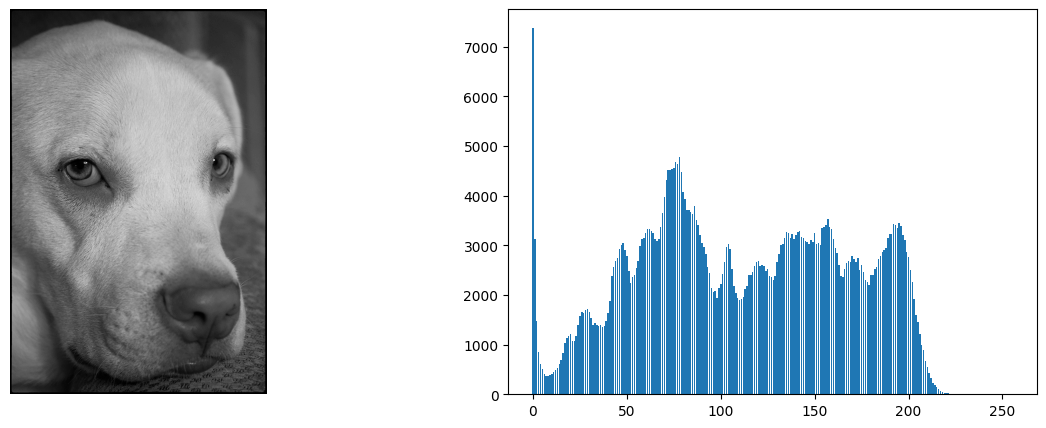

In [4]:
base_hist, _ = np.histogram(
    base_image, 
    bins=hist_size, range=hist_range
)

cum_sum = np.cumsum(base_hist) / (base_image.shape[0] * base_image.shape[1])

image_hist_plot(base_image, base_hist)

Арифметический сдвиг

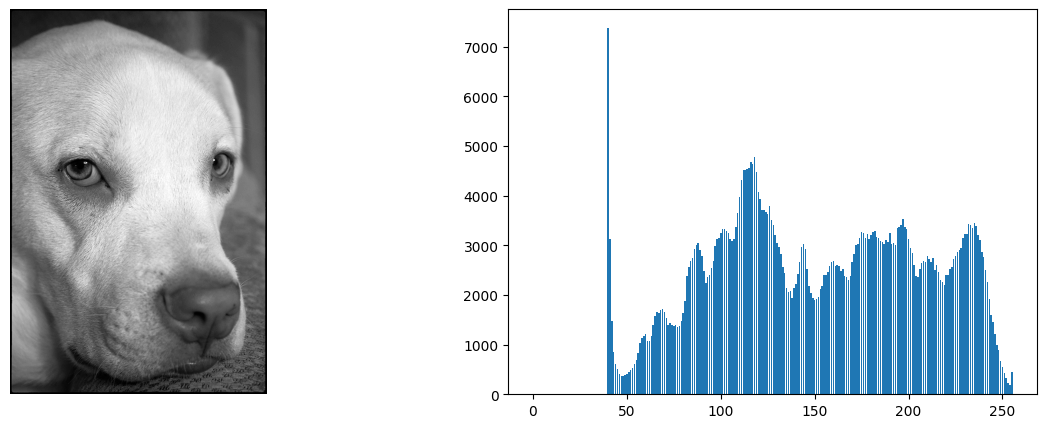

In [5]:
offset_image = cv.add(base_image, 40)

offset_hist, _ = np.histogram(
    offset_image, 
    bins=hist_size, range=hist_range
)

image_hist_plot(offset_image, offset_hist)

Растяжение диапозона

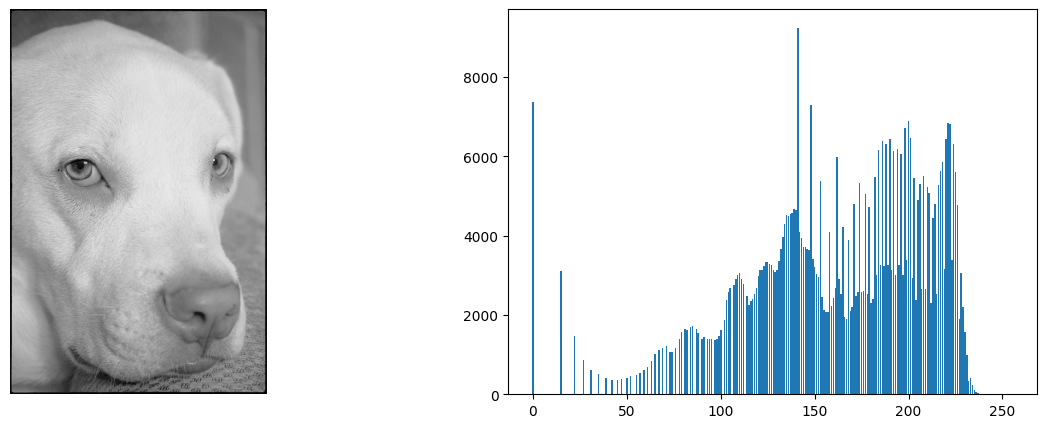

In [6]:
# Normalize brightness values from 0 to 1
stretched_image = base_image.copy()
stretched_image = stretched_image.astype(np.float32) / 255

alpha = 0.5
s_dr_pixel = stretched_image.min()
s_br_pixel = stretched_image.max()

# Apply changes to all image pixels
for x in range(base_image.shape[0]):
    for y in range(base_image.shape[1]):
        stretched_image[x, y] = np.power(
            (stretched_image[x, y] - s_dr_pixel) / (s_br_pixel - s_dr_pixel),
            alpha
        )

# Normalize brightness values back
stretched_image = (255 * stretched_image).clip(0, 255).astype(np.uint8)

stretched_hist, _ = np.histogram(
    stretched_image,
    bins=hist_size, range=hist_range
)

image_hist_plot(stretched_image, stretched_hist)

Равномерное преобразование

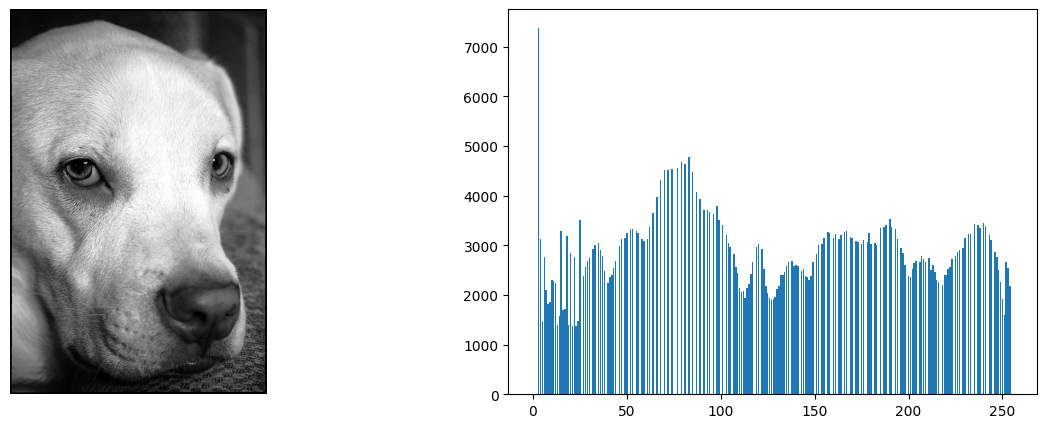

In [7]:
uniform_lut = [
    (br_pixel - dr_pixel)*cum_sum[intensity] + dr_pixel
    for intensity in range(hist_size)
]

uniform_image = apply_lut(base_image, uniform_lut)

uniform_hist, _ = np.histogram(
    uniform_image,
    bins=hist_size, range=hist_range
)

image_hist_plot(uniform_image, uniform_hist)

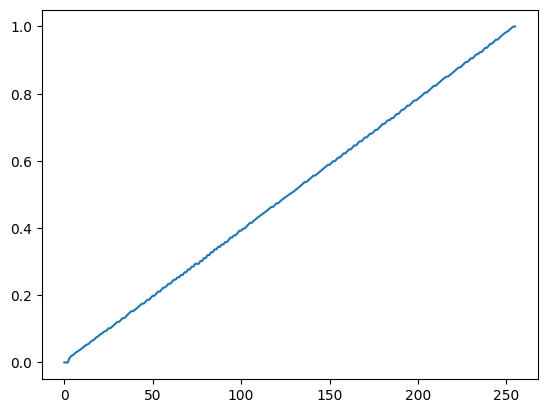

In [8]:
uniform_cum_sum = np.cumsum(uniform_hist) / (uniform_image.shape[0] * uniform_image.shape[1])

plt.plot(uniform_cum_sum)
plt.show()

Экспоненциальное преобразование

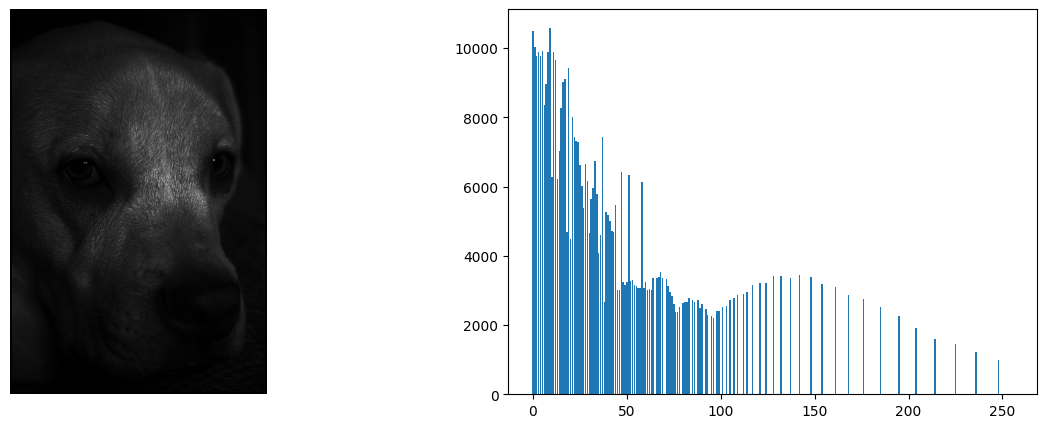

In [9]:
alpha = .02

exp_lut = [
    dr_pixel - (1 / alpha) * math.log(1 - cum_sum[intensity])
    if 1 - cum_sum[intensity] != 0 else intensity
    for intensity in range(hist_size)
]

exp_image = apply_lut(base_image, exp_lut)

exp_hist, _ = np.histogram(
    exp_image,
    bins=hist_size, range=hist_range
)

image_hist_plot(exp_image, exp_hist)

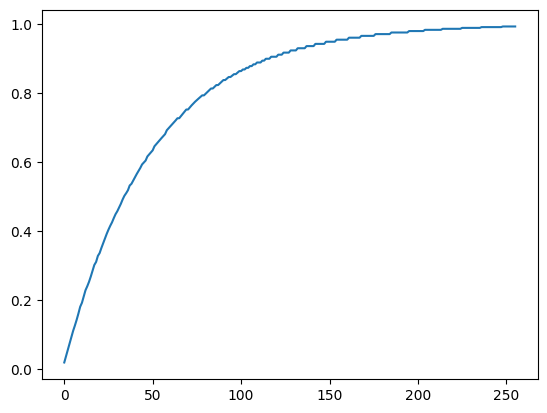

In [10]:
exp_cum_sum = np.cumsum(exp_hist) / (exp_image.shape[0] * exp_image.shape[1])

plt.plot(exp_cum_sum)
plt.show()

Преобразование по закону Рэлея

/tmp/ipykernel_96716/2509959804.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  dr_pixel + ( 2*(alpha**2)*math.log(1 / (1 - cum_sum[intensity])) ) ** (1/2)


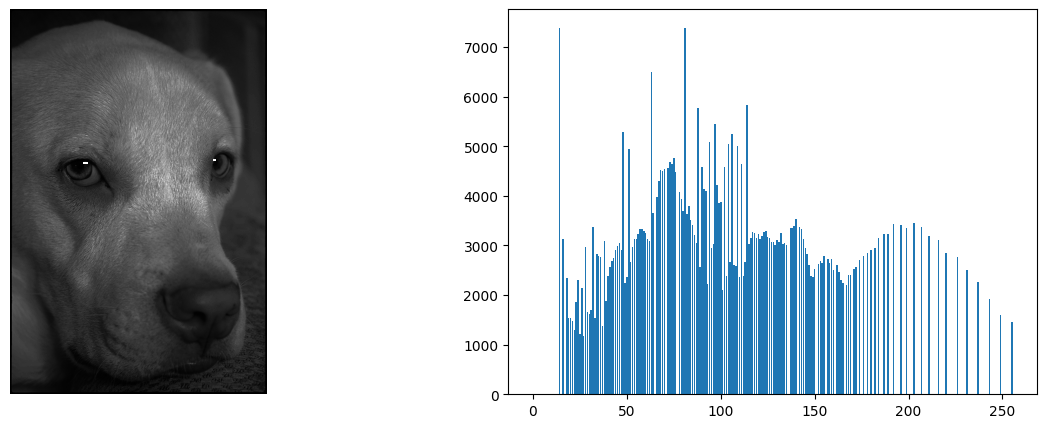

In [11]:
alpha = 85

ray_lut = [
    dr_pixel + ( 2*(alpha**2)*math.log(1 / (1 - cum_sum[intensity])) ) ** (1/2)
    for intensity in range(hist_size)
]

ray_image = apply_lut(base_image, ray_lut)

ray_hist, _ = np.histogram(
    ray_image,
    bins=hist_size, range=hist_range
)

image_hist_plot(ray_image, ray_hist)

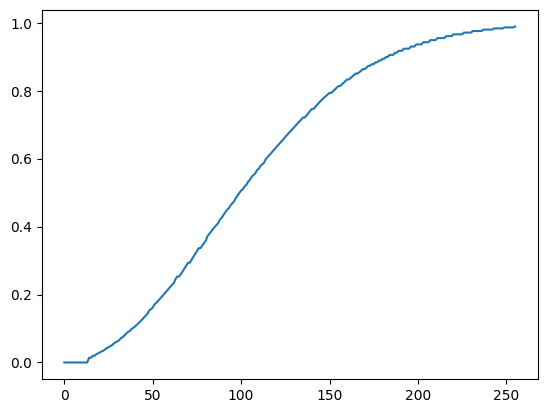

In [12]:
ray_cum_sum = np.cumsum(ray_hist) / (ray_image.shape[0] * ray_image.shape[1])

plt.plot(ray_cum_sum)
plt.show()

Преобразование по закону степени 2/3

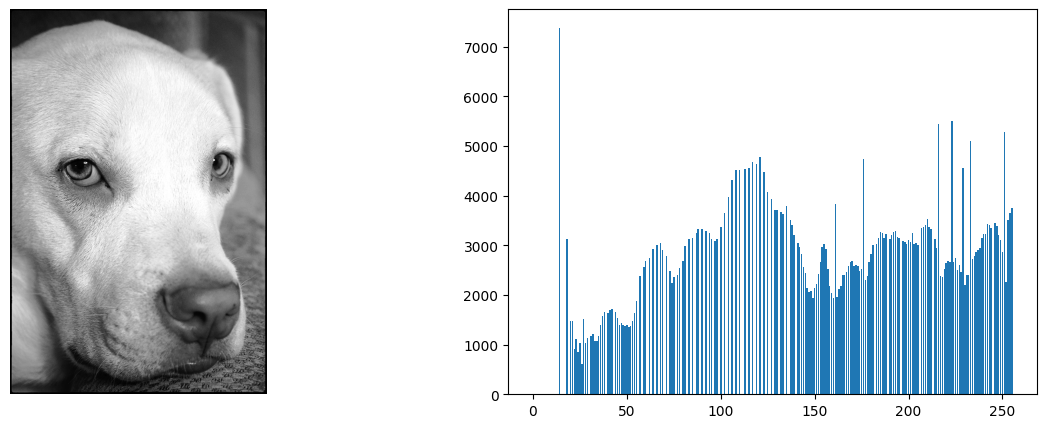

In [13]:
fr_lut = [
    cum_sum[intensity] ** (2 / 3)
    for intensity in range(hist_size)
]

fr_image = apply_lut(base_image, fr_lut)

fr_hist, _ = np.histogram(
    fr_image,
    bins=hist_size, range=(0, 1)
)

image_hist_plot(fr_image, fr_hist)

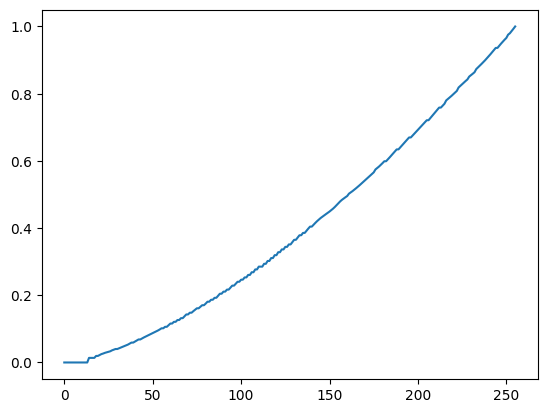

In [14]:
fr_cum_sum = np.cumsum(fr_hist) / (fr_image.shape[0] * fr_image.shape[1])

plt.plot(fr_cum_sum)
plt.show()

Гиперболическое преобразование

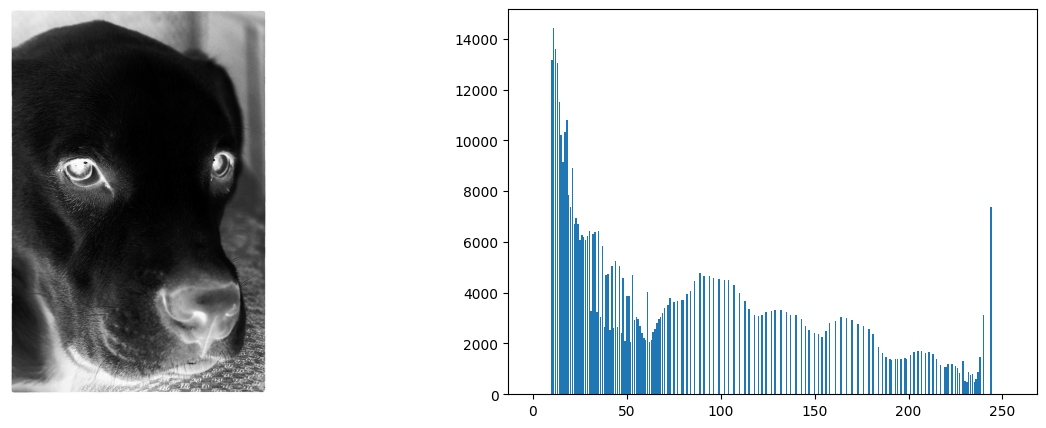

In [15]:
alpha = 0.04

hyper_lut = [
    np.power(alpha, cum_sum[intensity])
    for intensity in range(hist_size)
]

hyper_image = apply_lut(base_image, hyper_lut)

hyper_hist, _ = np.histogram(
    hyper_image,
    bins=hist_size, range=(0, 1)
)

image_hist_plot(hyper_image, hyper_hist)

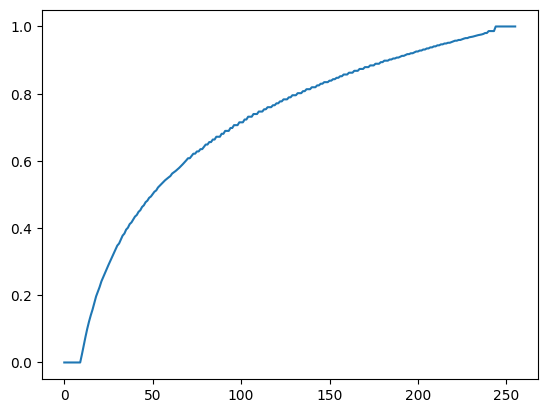

In [16]:
hyper_cum_sum = np.cumsum(hyper_hist) / (hyper_image.shape[0] * hyper_image.shape[1])

plt.plot(hyper_cum_sum)
plt.show()

/tmp/ipykernel_96716/4178721355.py:4: RuntimeWarning: invalid value encountered in scalar divide
  (intensity*(br_pixel - intensity)) / intensity


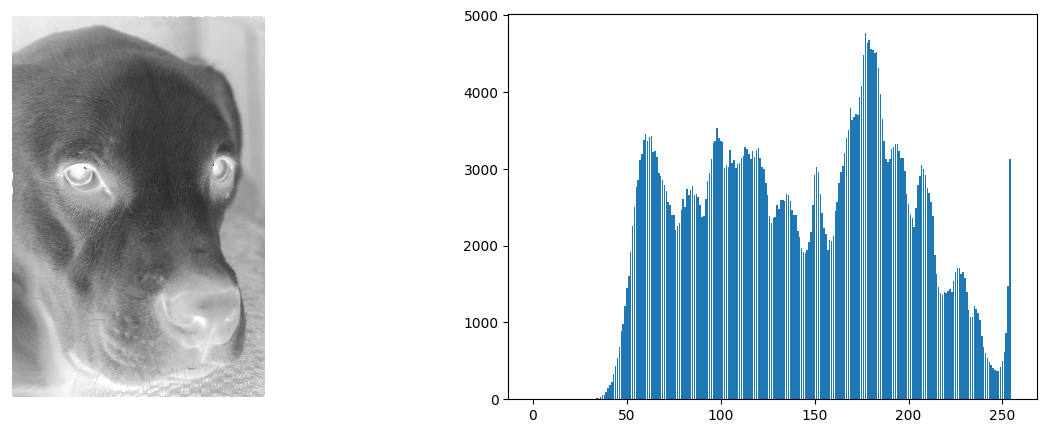

In [17]:
k = 1 / 64

solr_lut = [
    (intensity*(br_pixel - intensity)) / intensity
    for intensity in range(hist_size)
]

solr_image = apply_lut(base_image, solr_lut)

solr_hist, _ = np.histogram(
    solr_image,
    bins=hist_size, range=hist_range
)

solr_cum_sum = np.cumsum(solr_hist) / (solr_image.shape[0] * solr_image.shape[1])

image_hist_plot(solr_image, solr_hist)

Сравнение

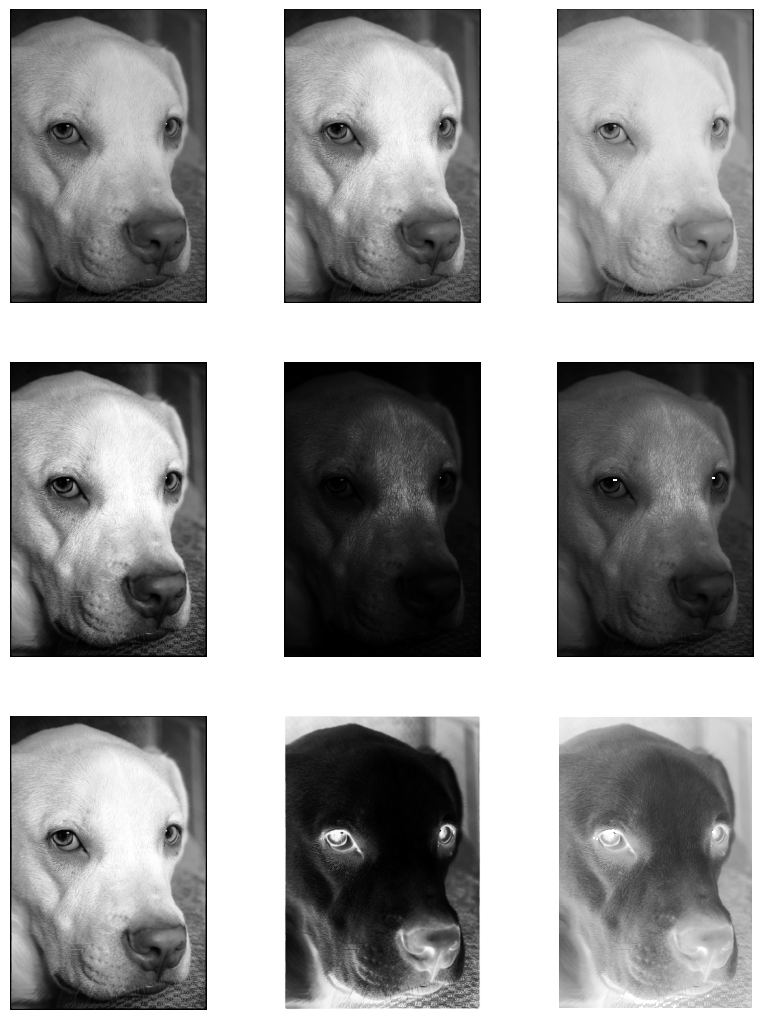

In [18]:
_, axis = plt.subplots(3, 3, figsize=(10, 13))

axis[0][0].imshow(base_image, cmap='gray')
axis[0][0].axis('off')

axis[0][1].imshow(offset_image, cmap='gray')
axis[0][1].axis('off')

axis[0][2].imshow(stretched_image, cmap='gray')
axis[0][2].axis('off')

axis[1][0].imshow(uniform_image, cmap='gray')
axis[1][0].axis('off')

axis[1][1].imshow(exp_image, cmap='gray')
axis[1][1].axis('off')

axis[1][2].imshow(ray_image, cmap='gray')
axis[1][2].axis('off')

axis[2][0].imshow(fr_image, cmap='gray')
axis[2][0].axis('off')

axis[2][1].imshow(hyper_image, cmap='gray')
axis[2][1].axis('off')

axis[2][2].imshow(solr_image, cmap='gray')
axis[2][2].axis('off')

plt.show()

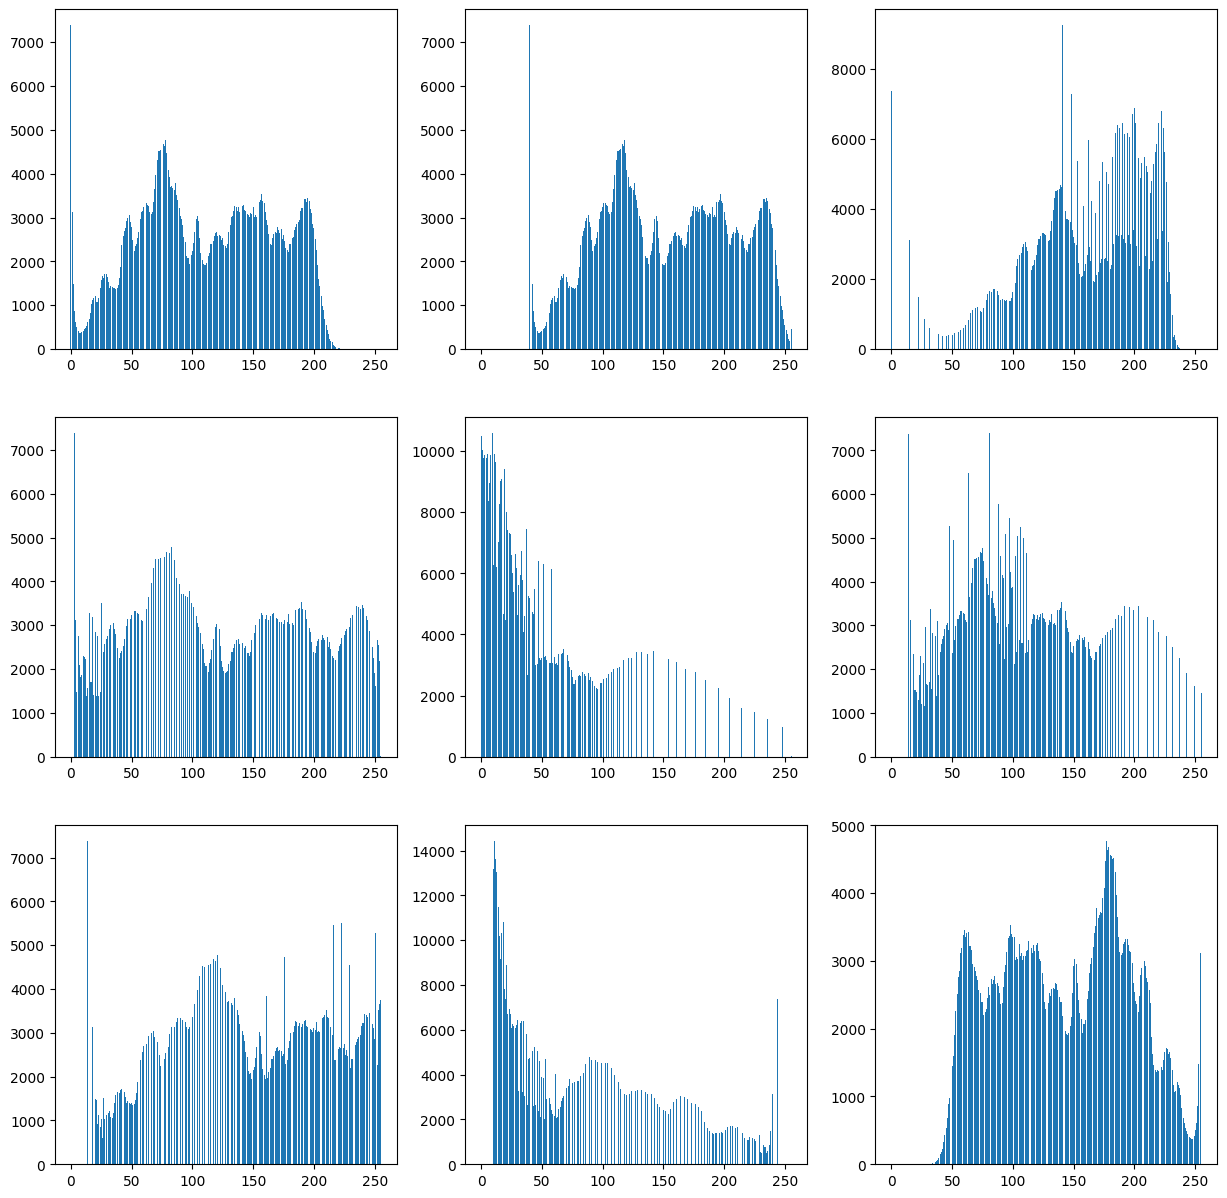

In [19]:
_, axis = plt.subplots(3, 3, figsize=(15, 15))
bins = [i for i in range(256)]

axis[0][0].bar(bins, base_hist)

axis[0][1].bar(bins, offset_hist)

axis[0][2].bar(bins, stretched_hist)

axis[1][0].bar(bins, uniform_hist)

axis[1][1].bar(bins, exp_hist)

axis[1][2].bar(bins, ray_hist)

axis[2][0].bar(bins, fr_hist)

axis[2][1].bar(bins, hyper_hist)

axis[2][2].bar(bins, solr_hist)

plt.show()

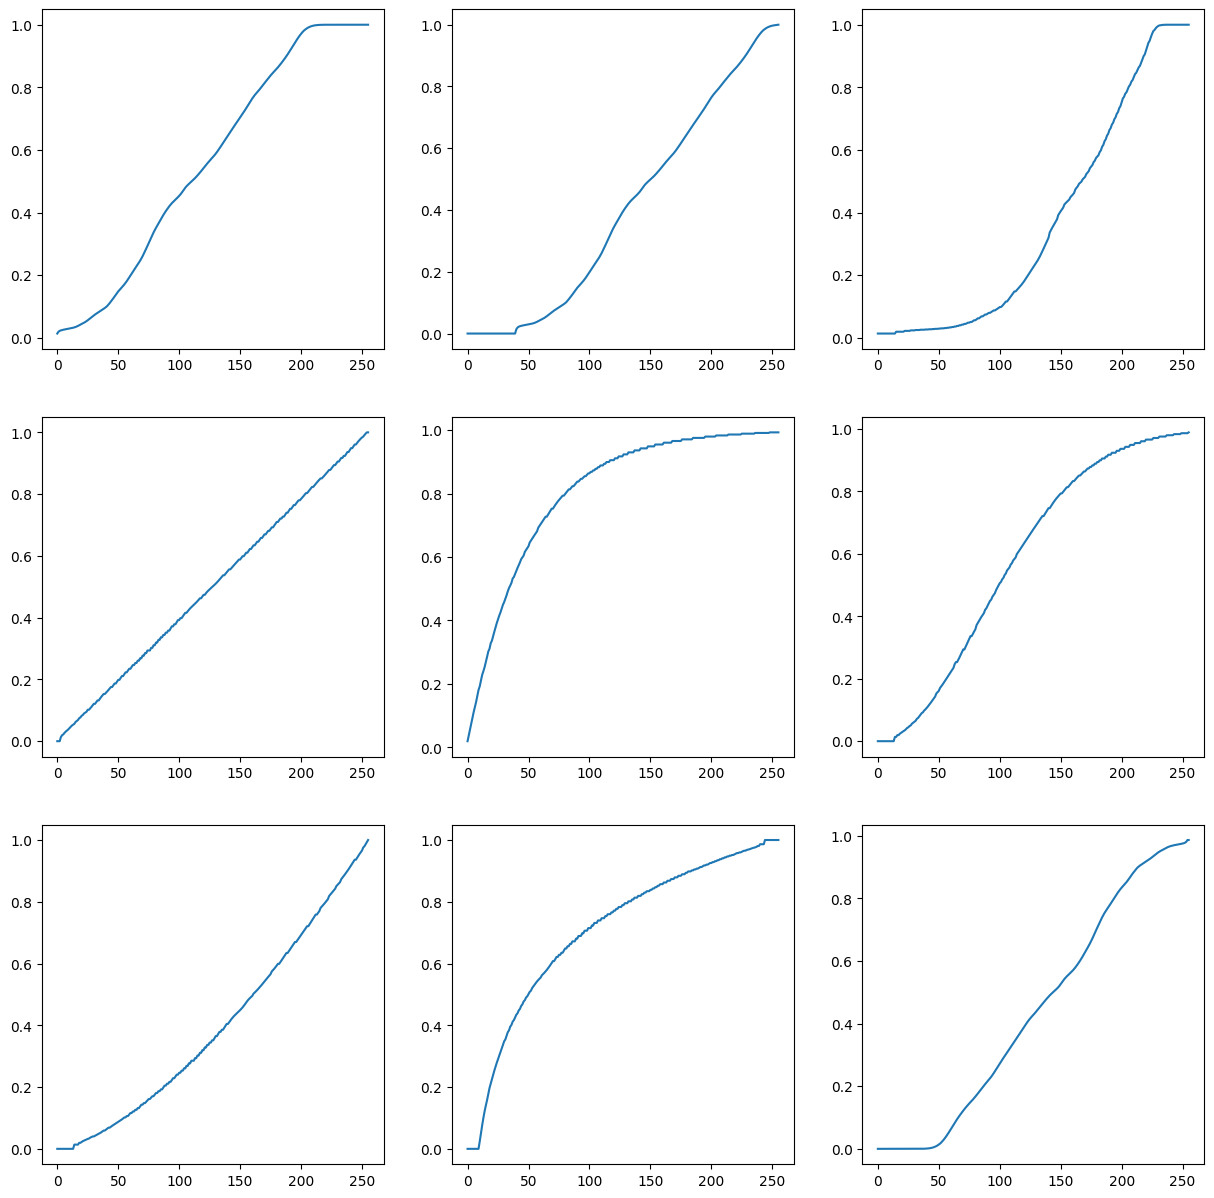

In [20]:
_, axis = plt.subplots(3, 3, figsize=(15, 15))

axis[0][0].plot(cum_sum)

axis[0][1].plot(np.cumsum(offset_hist) / (offset_image.shape[0] * offset_image.shape[1]))

axis[0][2].plot(np.cumsum(stretched_hist) / (stretched_image.shape[0] * stretched_image.shape[1]))

axis[1][0].plot(uniform_cum_sum)

axis[1][1].plot(exp_cum_sum)

axis[1][2].plot(ray_cum_sum)

axis[2][0].plot(fr_cum_sum)

axis[2][1].plot(hyper_cum_sum)

axis[2][2].plot(solr_cum_sum)

plt.show()